In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


# WITHOUT KERAS

In [2]:
x_temp = np.load("/kaggle/input/sign-language-digits-dataset/X.npy")
y_temp = np.load("/kaggle/input/sign-language-digits-dataset/Y.npy")

X = np.concatenate((x_temp[204:409],x_temp[822:1027]), axis = 0)

resulSetTrue = np.ones(205)
resultSetFalse = np.zeros(205)

Y = np.concatenate((resulSetTrue,resultSetFalse), axis = 0) 

print("X shape : ",X.shape)
print("Y shape : ",Y.shape)

X shape :  (410, 64, 64)
Y shape :  (410,)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.15)

#Now we have three dimensional array,but we need 2 dimensional array
x_train_reduced = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_reduced = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print("After reducing...")
print("X Train shape : ",x_train_reduced.shape)
print("Y Train shape : ",x_test_reduced.shape)


After reducing...
X Train shape :  (348, 4096)
Y Train shape :  (62, 4096)


In [4]:
#Now Transpose
x_train = x_train_reduced.T
x_test = x_test_reduced.T
y_train = y_train.T
y_test = y_test.T

* **ANN**

In [5]:
def initialize_parametres(x_train, y_train):
    parametres = {
        "weight1" : np.random.randn(3,x_train.shape[0]) * 0.1,
        "bias1" : np.random.randn(3,1),
        "weight2" : np.random.randn(y_train.shape[0],3) * 0.1,
        "bias2" : np.random.randn(y_train.shape[0],1)
    }
    
    return parametres

In [6]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [7]:
def compute_cost(A2, y):
    logProbs = np.multiply(np.log(A2), y)
    cost = -np.sum(logProbs)/y.shape[0]
    
    return cost

In [8]:
def forward_propagation(x_train, parametres):
    Z1 = np.dot(parametres["weight1"], x_train) + parametres["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parametres["weight2"], A1) + parametres["bias2"]
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2
    }
    
    return cache

In [9]:
def backward_propagation(parametres, cache, X ,Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parametres["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads


In [10]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [11]:
def predict(parameters,x_test):
    cache = forward_propagation(x_test,parameters)
    A2 = cache["A2"]
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [12]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []

    parameters = initialize_parametres(x_train, y_train)

    for i in range(0, num_iterations):

        cache = forward_propagation(x_train, parameters)
        
        A2 = cache["A2"]

        cost = compute_cost(A2, y_train)

        grads = backward_propagation(parameters, cache, x_train, y_train)

        parameters = update_parameters(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict(parameters,x_test)
    y_prediction_train = predict(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

Cost after iteration 0: 148.985197
Cost after iteration 100: 125.862839
Cost after iteration 200: 120.388964
Cost after iteration 300: 119.162145
Cost after iteration 400: 118.828404
Cost after iteration 500: 118.721863
Cost after iteration 600: 118.684932
Cost after iteration 700: 118.671675
Cost after iteration 800: 118.666844
Cost after iteration 900: 118.665065


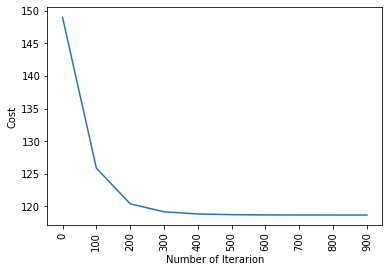

train accuracy: 51.724137931034484 %
test accuracy: 40.32258064516129 %


In [13]:
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=1000)

# With Keras

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

x_train = x_train_reduced
x_test = x_test_reduced
y_train = y_train
y_test = y_test


In [15]:
def createNeuralNetworks():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = createNeuralNetworks, epochs = 100) #iteration = epochs
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=3)
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy Mean = ",str(mean))
print("Accuracy Variance = ",str(variance))

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5184
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4960
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4916
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4880
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5218
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5179
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.4924
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.4846
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5443
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.5343
Epoch 11/100
8/8 [===========